# Assignment 5
#Heirarchical Clustering
#Author: Shreya Dubey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import metrics
sns.set()
from sklearn.model_selection import train_test_split
import warnings
import math
import copy
from itertools import combinations
from scipy.misc import comb
from scipy.cluster import hierarchy
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

#Reading the csv file 
dataset = pd.read_csv("spiral-dataset.csv")

# Changing into numpy
dataset = dataset.values
true_class = dataset[:,2]

In [2]:
# function to claculate l2 distance
def getDistance(point1,point2):
    dist = math.sqrt((point1.x-point2.x)**2 + (point1.y-point2.y)**2)
    return dist

# function to get singel linkage between clusters
def singleLinkDistance(cluster1,cluster2):
    dist_list = []
    if(isinstance(cluster1,Point) and isinstance(cluster2,Point)):
        return getDistance(cluster1,cluster2)
    if(isinstance(cluster1,Point) and not(isinstance(cluster2,Point))):
        for j in range (len(cluster2)):
            dist_list.append(getDistance(cluster1,cluster2[j]))
        return dist_list[np.argmin(dist_list)]
    if(not (isinstance(cluster1,Point)) and isinstance(cluster2,Point)):
        for j in range (len(cluster1)):
            dist_list.append(getDistance(cluster1[j],cluster2))
        return dist_list[np.argmin(dist_list)]
    for i in range (len(cluster1)):
        for j in range (len(cluster2)):
            dist_list.append(getDistance(cluster1[i],cluster2[j]))
    return dist_list[np.argmin(dist_list)]

# function to get distance matrix
def pairwiseDistance(dataset):
    result = []
    index1 = []
    index2 = []
    size = len(dataset)
    for i in range(size-1):
        for j in range(i+1,size):
            dist = singleLinkDistance(dataset[i],dataset[j])
            result.append(dist)
            index1.append(i)
            index2.append(j)
    return result,index1,index2

# function to get the min value form distance matrix
def getMin(result):
    return np.argmin(result)

# function merge 2 clusters
def mergeCluster(current_cluster,cluster1, cluster2):
    new_cluster = []
    if(isinstance(current_cluster[cluster1],Point) and isinstance(current_cluster[cluster2],Point)):
        new_cluster.append(current_cluster[cluster1])
        new_cluster.append(current_cluster[cluster2])
    elif(isinstance(current_cluster[cluster1],Point) and not (isinstance(current_cluster[cluster2],Point))):
        new_cluster.append(current_cluster[cluster1])
        for i in range(len(current_cluster[cluster2])):
            new_cluster.append(current_cluster[cluster2][i])
    elif (not(isinstance(current_cluster[cluster1],Point)) and isinstance(current_cluster[cluster2],Point)):
        new_cluster.append(current_cluster[cluster2])
        for i in range(len(current_cluster[cluster1])):
            new_cluster.append(current_cluster[cluster1][i])
    else:
        for i in range(len(current_cluster[cluster1])):
            new_cluster.append(current_cluster[cluster1][i])
        for i in range(len(current_cluster[cluster2])):
            new_cluster.append(current_cluster[cluster2][i])
    if (cluster1<cluster2):
        del current_cluster[cluster1]
        del current_cluster[cluster2-1]
    else:
        del current_cluster[cluster2]
        del current_cluster[cluster1-1]
    current_cluster.append(new_cluster)
    return current_cluster

# Point class
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y

In [3]:
def drawGraph(current_clusters):
    X1,X2,X3,Y1,Y2,Y3 = [],[],[],[],[],[]
    cluster = []
    for i in range(3):
        if(isinstance(current_clusters[i],Point)):
            if(i==0):
                X1.append(current_clusters[i].x)
                Y1.append(current_clusters[i].y)
                cluster.append(i+1)
            if(i==1):
                X2.append(current_clusters[i].x)
                Y2.append(current_clusters[i].y)
                cluster.append(i+1)
            if(i==2):
                X3.append(current_clusters[i].x)
                Y3.append(current_clusters[i].y)
                cluster.append(i+1)
        else:
            for j in range (len(current_clusters[i])):
                if(i==0):
                    X1.append(current_clusters[i][j].x)
                    Y1.append(current_clusters[i][j].y)
                    cluster.append(i+1)
                if(i==1):
                    X2.append(current_clusters[i][j].x)
                    Y2.append(current_clusters[i][j].y)
                    cluster.append(i+1)
                if(i==2):
                    X3.append(current_clusters[i][j].x)
                    Y3.append(current_clusters[i][j].y)
                    cluster.append(i+1)
    plt.plot(X1,Y1,'or')
    plt.plot(X2,Y2,'ob')
    plt.plot(X3,Y3,'og')
    plt.title("Plot of the given spiral data")
    plt.xlabel('X')  
    plt.ylabel('Y') 

    plt.show() 
    return cluster

In [4]:
# function to calculate random index
def rand_index (labels_true, labels_pred):
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

# function to calculate centroid
def getCentroid(group):
    x = 0
    y = 0
    for i in range(len(group)):
        x = x +group[i].x
        y = y +group[i].y
    x = x/len(group)
    y = y/len(group)
    return x, y

# function to calculate SSE
def getSSE(dataset,centers_new,clusters):
    sum1 = 0
    for i in range (3):
        for j in range (len(dataset[i])):
            dist = getDistance(dataset[i][j],centers_new[clusters[i]-1])
            sum1 = sum1 + (dist**2)
    return sum1

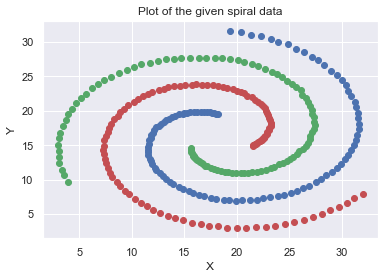

Rand_Index =  1.0
SSE =  32237.702102171577


In [5]:
# Task 3(a)
# Performing clustering using single linkage
current_clusters = []
for i in range (dataset.shape[0]):
    P = Point(dataset[i,0],dataset[i,1])
    current_clusters.append(P) 

data = current_clusters

n = 0
while len(current_clusters)>3:
    distance_matrix,index1,index2=pairwiseDistance(current_clusters)
    cluster_1 = index1[getMin(distance_matrix)]
    cluster_2 = index2[getMin(distance_matrix)]
    n = n+1
    current_clusters = mergeCluster(current_clusters,cluster_1,cluster_2)
cluster_single = drawGraph(current_clusters)
print("Rand_Index = ",rand_index(true_class,cluster_single))
centre_new = []
for i in range(3):
    x,y = getCentroid(data[i])
    #print(x,y)
    P = Point(x,y)
    centre_new.append(P)

print("SSE = ",getSSE(data,centre_new,cluster_single))

In [6]:
def completeLinkDistance(cluster1,cluster2):
    dist_list = []
    if(isinstance(cluster1,Point) and isinstance(cluster2,Point)):
        return getDistance(cluster1,cluster2)
    if(isinstance(cluster1,Point) and not(isinstance(cluster2,Point))):
        for j in range (len(cluster2)):
            dist_list.append(getDistance(cluster1,cluster2[j]))
        return dist_list[np.argmax(dist_list)]
    if(not (isinstance(cluster1,Point)) and isinstance(cluster2,Point)):
        for j in range (len(cluster1)):
            dist_list.append(getDistance(cluster1[j],cluster2))
        return dist_list[np.argmax(dist_list)]
    for i in range (len(cluster1)):
        for j in range (len(cluster2)):
            dist_list.append(getDistance(cluster1[i],cluster2[j]))
    return dist_list[np.argmax(dist_list)]

def pairwiseDistance_Complete(dataset):
    result = []
    index1 = []
    index2 = []
    size = len(dataset)
    for i in range(size-1):
        for j in range(i+1,size):
            dist = completeLinkDistance(dataset[i],dataset[j])
            result.append(dist)
            index1.append(i)
            index2.append(j)
    return result,index1,index2

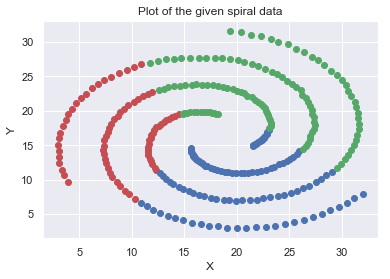

Rand_Index =  0.8438041058619836
SSE =  59902.90207756231


In [7]:
# Task 3(b)
# Performing clustering using complete linkage
current_clusters = []
for i in range (dataset.shape[0]):
    P = Point(dataset[i,0],dataset[i,1])
    current_clusters.append(P) 

data = current_clusters

n = 0
while len(current_clusters)>3:
    distance_matrix,index1,index2=pairwiseDistance_Complete(current_clusters)
    cluster_1 = index1[getMin(distance_matrix)]
    cluster_2 = index2[getMin(distance_matrix)]
    n = n+1
    current_clusters = mergeCluster(current_clusters,cluster_1,cluster_2)
cluster_complete = drawGraph(current_clusters)
print("Rand_Index = ",rand_index(true_class,cluster_complete))
centre_new = []
for i in range(3):
    x,y = getCentroid(data[i])
    #print(x,y)
    P = Point(x,y)
    centre_new.append(P)

print("SSE = ",getSSE(data,centre_new,cluster_complete))

In [8]:
def averageLinkDistance(cluster1,cluster2):
    dist_list = []
    if(isinstance(cluster1,Point) and isinstance(cluster2,Point)):
        return getDistance(cluster1,cluster2)
    if(isinstance(cluster1,Point) and not(isinstance(cluster2,Point))):
        for j in range (len(cluster2)):
            dist_list.append(getDistance(cluster1,cluster2[j]))
        return sum(dist_list)/len(dist_list)
    if(not (isinstance(cluster1,Point)) and isinstance(cluster2,Point)):
        for j in range (len(cluster1)):
            dist_list.append(getDistance(cluster1[j],cluster2))
        return sum(dist_list)/len(dist_list)
    for i in range (len(cluster1)):
        for j in range (len(cluster2)):
            dist_list.append(getDistance(cluster1[i],cluster2[j]))
    return sum(dist_list)/len(dist_list)

def pairwiseDistance_average(dataset):
    result = []
    index1 = []
    index2 = []
    size = len(dataset)
    for i in range(size-1):
        for j in range(i+1,size):
            dist = averageLinkDistance(dataset[i],dataset[j])
            result.append(dist)
            index1.append(i)
            index2.append(j)
    return result,index1,index2

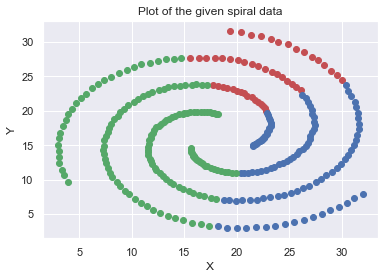

Rand_Index =  0.7227718690741198
SSE =  62906.06671803412


In [9]:
# Task 3(c)
# Performing clustering using Average linkage
current_clusters = []
for i in range (dataset.shape[0]):
    P = Point(dataset[i,0],dataset[i,1])
    current_clusters.append(P) 

data = current_clusters

n = 0
while len(current_clusters)>3:
    distance_matrix,index1,index2=pairwiseDistance_average(current_clusters)
    cluster_1 = index1[getMin(distance_matrix)]
    cluster_2 = index2[getMin(distance_matrix)]
    n = n+1
    current_clusters = mergeCluster(current_clusters,cluster_1,cluster_2)
cluster_avg = drawGraph(current_clusters)
print("Rand_Index = ",rand_index(true_class,cluster_avg))
centre_new = []
for i in range(3):
    x,y = getCentroid(data[i])
    #print(x,y)
    P = Point(x,y)
    centre_new.append(P)

print("SSE = ",getSSE(data,centre_new,cluster_avg))

In [10]:
def centroidLinkDistance(cluster1,cluster2):
    dist_list = []
    if(isinstance(cluster1,Point) and isinstance(cluster2,Point)):
        return getDistance(cluster1,cluster2)
    if(isinstance(cluster1,Point) and not(isinstance(cluster2,Point))):
        x,y = 0,0
        for j in range (len(cluster2)):
            x = x+cluster2[j].x
            y = y+cluster2[j].y
        x = x/len(cluster2)
        y = y/len(cluster2)
        P2 = Point(x,y)
        return getDistance(cluster1,P2)
    if(not (isinstance(cluster1,Point)) and isinstance(cluster2,Point)):
        x,y = 0,0
        for j in range (len(cluster1)):
            x = x+cluster1[j].x
            y = y+cluster1[j].y
        x = x/len(cluster1)
        y = y/len(cluster1)
        P1 = Point(x,y)
        return getDistance(P1,cluster2)
    x,y = 0,0
    for j in range (len(cluster1)):
        x = x+cluster1[j].x
        y = y+cluster1[j].y
    x = x/len(cluster1)
    y = y/len(cluster1)
    P1 = Point(x,y)
    x,y = 0,0
    for j in range (len(cluster2)):
        x = x+cluster2[j].x
        y = y+cluster2[j].y
    x = x/len(cluster2)
    y = y/len(cluster2)
    P2 = Point(x,y)
    return getDistance(P1,P2)

def pairwiseDistance_centroid(dataset):
    result = []
    index1 = []
    index2 = []
    size = len(dataset)
    for i in range(size-1):
        for j in range(i+1,size):
            dist = averageLinkDistance(dataset[i],dataset[j])
            result.append(dist)
            index1.append(i)
            index2.append(j)
    return result,index1,index2

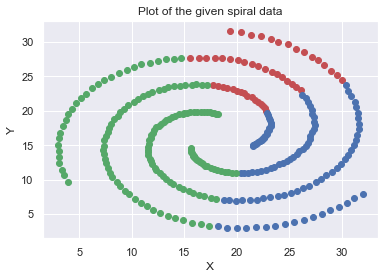

Rand_Index =  0.7227718690741198
SSE =  62906.06671803412


In [11]:
# Task 3(d)
# Performing clustering using centroid linkage
current_clusters = []
for i in range (dataset.shape[0]):
    P = Point(dataset[i,0],dataset[i,1])
    current_clusters.append(P) 

data = current_clusters

n = 0
while len(current_clusters)>3:
    distance_matrix,index1,index2=pairwiseDistance_centroid(current_clusters)
    cluster_1 = index1[getMin(distance_matrix)]
    cluster_2 = index2[getMin(distance_matrix)]
    n = n+1
    current_clusters = mergeCluster(current_clusters,cluster_1,cluster_2)
cluster_centroid = drawGraph(current_clusters)
print("Rand_Index = ",rand_index(true_class,cluster_centroid))
centre_new = []
for i in range(3):
    x,y = getCentroid(data[i])
    #print(x,y)
    P = Point(x,y)
    centre_new.append(P)

print("SSE = ",getSSE(data,centre_new,cluster_centroid))

In [12]:
# function to calculate L3 distance
def getDistance_l3(point1,point2):
    dist = ((abs(point1.x-point2.x))**3+(abs(point1.y-point2.y))**3)**(1/3)
    return dist

def singleLinkDistance_l3(cluster1,cluster2):
    dist_list = []
    if(isinstance(cluster1,Point) and isinstance(cluster2,Point)):
        return getDistance_l3(cluster1,cluster2)
    if(isinstance(cluster1,Point) and not(isinstance(cluster2,Point))):
        for j in range (len(cluster2)):
            dist_list.append(getDistance_l3(cluster1,cluster2[j]))
        return dist_list[np.argmin(dist_list)]
    if(not (isinstance(cluster1,Point)) and isinstance(cluster2,Point)):
        for j in range (len(cluster1)):
            dist_list.append(getDistance_l3(cluster1[j],cluster2))
        return dist_list[np.argmin(dist_list)]
    for i in range (len(cluster1)):
        for j in range (len(cluster2)):
            dist_list.append(getDistance_l3(cluster1[i],cluster2[j]))
    return dist_list[np.argmin(dist_list)]

def pairwiseDistance_l3(dataset):
    result = []
    index1 = []
    index2 = []
    size = len(dataset)
    for i in range(size-1):
        for j in range(i+1,size):
            dist = singleLinkDistance_l3(dataset[i],dataset[j])
            result.append(dist)
            index1.append(i)
            index2.append(j)
    return result,index1,index2

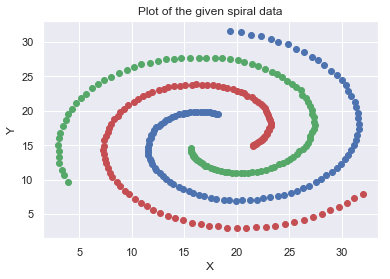

Rand_Index =  1.0
SSE =  32237.70210217158


In [13]:
# Taskk E5
# Performing clustering using Singel Linkage and L3 distance
current_clusters = []
for i in range (dataset.shape[0]):
    P = Point(dataset[i,0],dataset[i,1])
    current_clusters.append(P) 

data = current_clusters

n = 0
while len(current_clusters)>3:
    distance_matrix,index1,index2=pairwiseDistance_l3(current_clusters)
    cluster_1 = index1[getMin(distance_matrix)]
    cluster_2 = index2[getMin(distance_matrix)]
    n = n+1
    current_clusters = mergeCluster(current_clusters,cluster_1,cluster_2)
cluster_single_l3 = drawGraph(current_clusters)
print("Rand_Index = ",rand_index(true_class,cluster_single_l3))
centre_new = []
for i in range(3):
    x,y = getCentroid(data[i])
    #print(x,y)
    P = Point(x,y)
    centre_new.append(P)

print("SSE = ",getSSE(data,centre_new,cluster_single_l3))

In [6]:
def getDistance_cosine(point1,point2):
    num = (point1.x*point2.x)+(point1.y*point2.y)
    den = (math.sqrt((point1.x**2)+(point1.y**2))*math.sqrt((point2.x**2)+(point2.y**2)))
    return num/den

def singleLinkDistance_cosine(cluster1,cluster2):
    dist_list = []
    if(isinstance(cluster1,Point) and isinstance(cluster2,Point)):
        return getDistance_cosine(cluster1,cluster2)
    if(isinstance(cluster1,Point) and not(isinstance(cluster2,Point))):
        for j in range (len(cluster2)):
            dist_list.append(getDistance_cosine(cluster1,cluster2[j]))
        return dist_list[np.argmin(dist_list)]
    if(not (isinstance(cluster1,Point)) and isinstance(cluster2,Point)):
        for j in range (len(cluster1)):
            dist_list.append(getDistance_cosine(cluster1[j],cluster2))
        return dist_list[np.argmin(dist_list)]
    for i in range (len(cluster1)):
        for j in range (len(cluster2)):
            dist_list.append(getDistance_cosine(cluster1[i],cluster2[j]))
    return dist_list[np.argmin(dist_list)]

def pairwiseDistance_cosine(dataset):
    result = []
    index1 = []
    index2 = []
    size = len(dataset)
    for i in range(size-1):
        for j in range(i+1,size):
            dist = singleLinkDistance_cosine(dataset[i],dataset[j])
            result.append(dist)
            index1.append(i)
            index2.append(j)
    return result,index1,index2

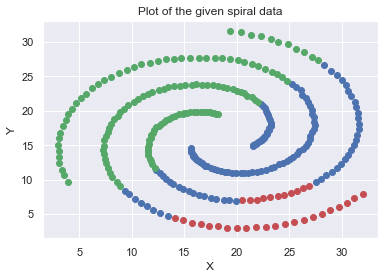

Rand_Index =  0.7289966196718608
SSE =  75692.37851239671


In [8]:
# Task E4
# Performing clustering using Singel Linkage and cosine similarity
current_clusters = []
for i in range (dataset.shape[0]):
    P = Point(dataset[i,0],dataset[i,1])
    current_clusters.append(P) 

data = current_clusters

n = 0
while len(current_clusters)>3:
    distance_matrix,index1,index2=pairwiseDistance_cosine(current_clusters)
    cluster_1 = index1[np.argmax(distance_matrix)]
    cluster_2 = index2[np.argmax(distance_matrix)]
    n = n+1
    current_clusters = mergeCluster(current_clusters,cluster_1,cluster_2)
cluster_single_cosine = drawGraph(current_clusters)
print("Rand_Index = ",rand_index(true_class,cluster_single_cosine))
centre_new = []
for i in range(3):
    x,y = getCentroid(data[i])
    #print(x,y)
    P = Point(x,y)
    centre_new.append(P)

print("SSE = ",getSSE(data,centre_new,cluster_single_cosine))

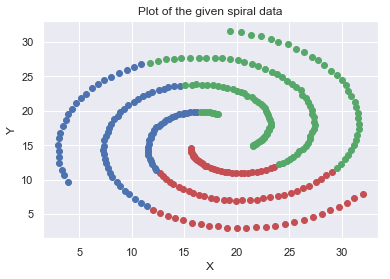

Rand_Index =  0.8493692802374474
SSE =  49633.47635007849


In [16]:
def completeLinkDistance_l3(cluster1,cluster2):
    dist_list = []
    if(isinstance(cluster1,Point) and isinstance(cluster2,Point)):
        return getDistance_l3(cluster1,cluster2)
    if(isinstance(cluster1,Point) and not(isinstance(cluster2,Point))):
        for j in range (len(cluster2)):
            dist_list.append(getDistance_l3(cluster1,cluster2[j]))
        return dist_list[np.argmax(dist_list)]
    if(not (isinstance(cluster1,Point)) and isinstance(cluster2,Point)):
        for j in range (len(cluster1)):
            dist_list.append(getDistance_l3(cluster1[j],cluster2))
        return dist_list[np.argmax(dist_list)]
    for i in range (len(cluster1)):
        for j in range (len(cluster2)):
            dist_list.append(getDistance_l3(cluster1[i],cluster2[j]))
    return dist_list[np.argmax(dist_list)]

def pairwiseDistance_Complete_l3(dataset):
    result = []
    index1 = []
    index2 = []
    size = len(dataset)
    for i in range(size-1):
        for j in range(i+1,size):
            dist = completeLinkDistance_l3(dataset[i],dataset[j])
            result.append(dist)
            index1.append(i)
            index2.append(j)
    return result,index1,index2

# Task E5
# Performing clustering using Complete Linkage and L3 similarity
current_clusters = []
for i in range (dataset.shape[0]):
    P = Point(dataset[i,0],dataset[i,1])
    current_clusters.append(P) 

data = current_clusters

n = 0
while len(current_clusters)>3:
    distance_matrix,index1,index2=pairwiseDistance_Complete_l3(current_clusters)
    cluster_1 = index1[getMin(distance_matrix)]
    cluster_2 = index2[getMin(distance_matrix)]
    n = n+1
    current_clusters = mergeCluster(current_clusters,cluster_1,cluster_2)
cluster_complete_l3 = drawGraph(current_clusters)
print("Rand_Index = ",rand_index(true_class,cluster_complete_l3))
centre_new = []
for i in range(3):
    x,y = getCentroid(data[i])
    #print(x,y)
    P = Point(x,y)
    centre_new.append(P)

print("SSE = ",getSSE(data,centre_new,cluster_complete_l3))

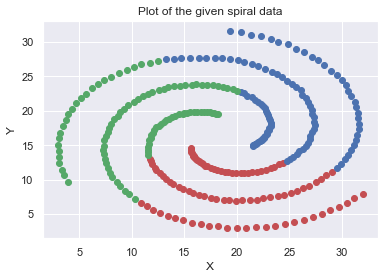

Rand_Index =  0.9664852832055404
SSE =  48362.023576000036


In [17]:
def averageLinkDistance_l3(cluster1,cluster2):
    dist_list = []
    if(isinstance(cluster1,Point) and isinstance(cluster2,Point)):
        return getDistance_l3(cluster1,cluster2)
    if(isinstance(cluster1,Point) and not(isinstance(cluster2,Point))):
        for j in range (len(cluster2)):
            dist_list.append(getDistance_l3(cluster1,cluster2[j]))
        return sum(dist_list)/len(dist_list)
    if(not (isinstance(cluster1,Point)) and isinstance(cluster2,Point)):
        for j in range (len(cluster1)):
            dist_list.append(getDistance_l3(cluster1[j],cluster2))
        return sum(dist_list)/len(dist_list)
    for i in range (len(cluster1)):
        for j in range (len(cluster2)):
            dist_list.append(getDistance_l3(cluster1[i],cluster2[j]))
    return sum(dist_list)/len(dist_list)

def pairwiseDistance_average_l3(dataset):
    result = []
    index1 = []
    index2 = []
    size = len(dataset)
    for i in range(size-1):
        for j in range(i+1,size):
            dist = averageLinkDistance_l3(dataset[i],dataset[j])
            result.append(dist)
            index1.append(i)
            index2.append(j)
    return result,index1,index2

# Task E5
# Performing clustering using Average Linkage and L3 distance
current_clusters = []
for i in range (dataset.shape[0]):
    P = Point(dataset[i,0],dataset[i,1])
    current_clusters.append(P) 

data = current_clusters

n = 0
while len(current_clusters)>3:
    distance_matrix,index1,index2=pairwiseDistance_average_l3(current_clusters)
    cluster_1 = index1[getMin(distance_matrix)]
    cluster_2 = index2[getMin(distance_matrix)]
    n = n+1
    current_clusters = mergeCluster(current_clusters,cluster_1,cluster_2)
cluster_average_l3 = drawGraph(current_clusters)
print("Rand_Index = ",rand_index(true_class,cluster_average_l3))
centre_new = []
for i in range(3):
    x,y = getCentroid(data[i])
    #print(x,y)
    P = Point(x,y)
    centre_new.append(P)

print("SSE = ",getSSE(data,centre_new,cluster_average_l3))

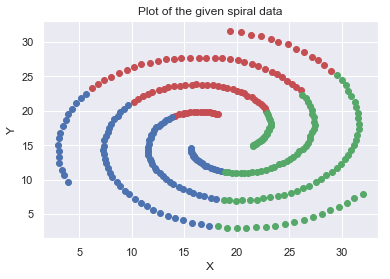

Rand_Index =  0.9033308599224998
SSE =  50727.76178963891


In [18]:
def centroidLinkDistance_l3(cluster1,cluster2):
    dist_list = []
    if(isinstance(cluster1,Point) and isinstance(cluster2,Point)):
        return getDistance_l3(cluster1,cluster2)
    if(isinstance(cluster1,Point) and not(isinstance(cluster2,Point))):
        x,y = 0,0
        for j in range (len(cluster2)):
            x = x+cluster2[j].x
            y = y+cluster2[j].y
        x = x/len(cluster2)
        y = y/len(cluster2)
        P2 = Point(x,y)
        return getDistance_l3(cluster1,P2)
    if(not (isinstance(cluster1,Point)) and isinstance(cluster2,Point)):
        x,y = 0,0
        for j in range (len(cluster1)):
            x = x+cluster1[j].x
            y = y+cluster1[j].y
        x = x/len(cluster1)
        y = y/len(cluster1)
        P1 = Point(x,y)
        return getDistance_l3(P1,cluster2)
    x,y = 0,0
    for j in range (len(cluster1)):
        x = x+cluster1[j].x
        y = y+cluster1[j].y
    x = x/len(cluster1)
    y = y/len(cluster1)
    P1 = Point(x,y)
    x,y = 0,0
    for j in range (len(cluster2)):
        x = x+cluster2[j].x
        y = y+cluster2[j].y
    x = x/len(cluster2)
    y = y/len(cluster2)
    P2 = Point(x,y)
    return getDistance_l3(P1,P2)

def pairwiseDistance_centroid_l3(dataset):
    result = []
    index1 = []
    index2 = []
    size = len(dataset)
    for i in range(size-1):
        for j in range(i+1,size):
            dist = centroidLinkDistance_l3(dataset[i],dataset[j])
            result.append(dist)
            index1.append(i)
            index2.append(j)
    return result,index1,index2

# Task E5
# Performing clustering using Centroid Linkage and L3 distance
current_clusters = []
for i in range (dataset.shape[0]):
    P = Point(dataset[i,0],dataset[i,1])
    current_clusters.append(P) 

data = current_clusters

n = 0
while len(current_clusters)>3:
    distance_matrix,index1,index2=pairwiseDistance_centroid_l3(current_clusters)
    cluster_1 = index1[getMin(distance_matrix)]
    cluster_2 = index2[getMin(distance_matrix)]
    n = n+1
    current_clusters = mergeCluster(current_clusters,cluster_1,cluster_2)
cluster_centroid_l3 = drawGraph(current_clusters)
print("Rand_Index = ",rand_index(true_class,cluster_centroid_l3))
centre_new = []
for i in range(3):
    x,y = getCentroid(data[i])
    #print(x,y)
    P = Point(x,y)
    centre_new.append(P)

print("SSE = ",getSSE(data,centre_new,cluster_centroid_l3))

# Task 3(e)
Out of the 4 clustering results that we see in Task 3a, 3b, 3c and 3d The best clustering is the single linkange clustering with euclidean distnace as the similarity measure. It has the highest random index measure which is 1 and the SSE value is 32237.702102171577 . Also from the graph we can see that all the spherical clusters are clustered accordingly.